In [1]:
IS_COLAB = ('google.colab' in str(get_ipython()))
if IS_COLAB:
  %tensorflow_version 2.x

In [19]:
# TensorFlow and tf.keras
from matplotlib.pyplot import subplot,imshow,title,gray,NullLocator
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [25]:
if IS_COLAB:
  from google.colab import drive
  drive.mount('/gdrive')
  filepath = "/gdrive/My Drive/colab_data/"
else:
  filepath = "../ml_store"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [23]:
def save_model(m,filename):
    model_json = m.to_json()
    with open(filepath+filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    m.save_weights(filepath+filename+".h5")
    print("Saved model to disk")

def load_model_weights(filename, model):
    model.load_weights(filepath+filename+".h5")
    print("Loaded weights from disk")
    return model

def load_model(filename):
    json_file = open(filepath+filename+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    m = model_from_json(loaded_model_json)
    # load weights into new model
    m.load_weights(filepath+filename+".h5")
    print("Loaded model from disk")
    return m

In [24]:
import urllib.request

filepath_data = "../dataset/"
url = "https://tvml.github.io/ml2021/dataset/"

def get_file(filename,local):
    if local:
        return filepath_data+filename
    else:
        urllib.request.urlretrieve (url+filename, filename)
        return filename

In [8]:
def get_eigen(A):
    # computing eigenvalues and eigenvectors of the covariance matrix
    # of the set of vectors corresponding to rows of A
    # compute mean for each column (feature)
    means = np.mean(A,axis=0)
    # subtract the mean (along columns): each feature has now zero mean
    M = (A-means)
    # derive the covariance matrix of the set of vectors corresponding to rows of A
    c = np.cov(M, rowvar=0)
    # compute the sets of eigenvalues and eigenvectors of the covariance matrix
    [evals,evects] = np.linalg.eig(c)
    # compute indices of eigenvalues sorted in descending order
    idx = np.argsort(evals) 
    # derive indices of eigenvalues sorted in ascending order
    idx = idx[::-1]       
    # sort eigenvectors (columns of evects) according to the sorted eigenvalues
    evects = evects[:,idx]
    # sort eigenvalues in ascending order
    evals = evals[idx] 
    return evals, evects, M

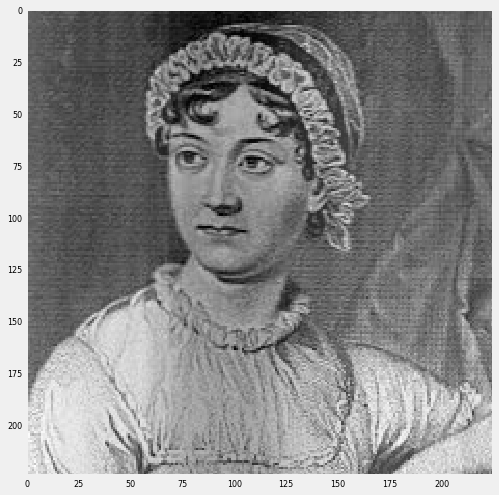

In [9]:
plt.rcParams["axes.grid"] = False
img =plt.imread(get_file('austen.jpg', False))
bw = np.mean(img,2)
val,vec,bw_c=get_eigen(bw)
full_pc = bw.shape[0]
imshow(bw_c, cmap='gray');

In [10]:
dims = img.shape
encoding_dim = 16
input_size = dims[1]*dims[2]

In [11]:
encoding_dim
x_train = img.reshape((dims[0], input_size))

In [12]:
x_train = x_train.astype('float32') / 255.
x_train.shape

(225, 675)

In [15]:
ae = Sequential()

# Encoder Layers
ae.add(Dense(encoding_dim, input_shape=(input_size,), activation='relu'))

# Decoder Layers
ae.add(Dense(input_size, activation='sigmoid'))

ae.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                10816     
_________________________________________________________________
dense_3 (Dense)              (None, 675)               11475     
Total params: 22,291
Trainable params: 22,291
Non-trainable params: 0
_________________________________________________________________


In [20]:
ae.compile(optimizer=Adam(learning_rate=1), loss='binary_crossentropy')

In [ ]:
#ae = load_model_weights('ae_austen', ae)

In [21]:
history = ae.fit(x_train, x_train, epochs=150, batch_size=5)

Epoch 1/150
45/45 [==============================] - 1s 2ms/step - loss: 15.9221
Epoch 2/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6664
Epoch 3/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6653
Epoch 4/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6744
Epoch 5/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6581
Epoch 6/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6606
Epoch 7/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6737
Epoch 8/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6612
Epoch 9/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6615
Epoch 10/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6712
Epoch 11/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6707
Epoch 12/150
45/45 [==============================] - 0s 2ms/step - loss: 0.6589
Epoch 13/150
45/45 [================

In [26]:
save_model(ae,'ae_austen')

Saved model to disk


In [27]:
input_img = Input(shape=(input_size,))
encoder_layer1 = ae.layers[0]
encoder = Model(input_img, encoder_layer1(input_img))

encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 675)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                10816     
Total params: 10,816
Trainable params: 10,816
Non-trainable params: 0
_________________________________________________________________


In [28]:
encoded_rows = encoder.predict(x_train)
decoded_rows = ae.predict(x_train)

In [30]:
dec_image = decoded_rows.reshape(-1,225,3)
dec_image = dec_image

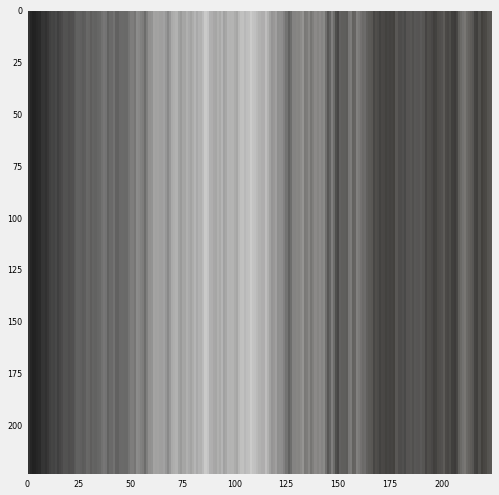

In [32]:
imshow(dec_image, cmap='gray');

In [33]:
ae2 = Sequential()

# Encoder Layers
ae2.add(Dense(9 * encoding_dim, input_shape=(input_size,), activation='relu'))
ae2.add(Dense(3 * encoding_dim, activation='relu'))
ae2.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
ae2.add(Dense(3 * encoding_dim, activation='relu'))
ae2.add(Dense(9 * encoding_dim, activation='relu'))
ae2.add(Dense(input_size, activation='sigmoid'))

ae2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 144)               97344     
_________________________________________________________________
dense_5 (Dense)              (None, 48)                6960      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                784       
_________________________________________________________________
dense_7 (Dense)              (None, 48)                816       
_________________________________________________________________
dense_8 (Dense)              (None, 144)               7056      
_________________________________________________________________
dense_9 (Dense)              (None, 675)               97875     
Total params: 210,835
Trainable params: 210,835
Non-trainable params: 0
________________________________________________

In [34]:
ae2.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
history2 = ae2.fit(x_train, x_train,
                epochs=150,
                batch_size=5)

Epoch 1/150
45/45 [==============================] - 1s 3ms/step - loss: 0.6191
Epoch 2/150
45/45 [==============================] - 0s 3ms/step - loss: 0.5525
Epoch 3/150
45/45 [==============================] - 0s 3ms/step - loss: 0.5440
Epoch 4/150
45/45 [==============================] - 0s 4ms/step - loss: 0.5356
Epoch 5/150
45/45 [==============================] - 0s 4ms/step - loss: 0.5269
Epoch 6/150
45/45 [==============================] - 0s 4ms/step - loss: 0.5213
Epoch 7/150
45/45 [==============================] - 0s 4ms/step - loss: 0.5177
Epoch 8/150
45/45 [==============================] - 0s 4ms/step - loss: 0.5141
Epoch 9/150
45/45 [==============================] - 0s 3ms/step - loss: 0.5125
Epoch 10/150
45/45 [==============================] - 0s 4ms/step - loss: 0.5109
Epoch 11/150
45/45 [==============================] - 0s 3ms/step - loss: 0.5083
Epoch 12/150
45/45 [==============================] - 0s 4ms/step - loss: 0.5065
Epoch 13/150
45/45 [=================

In [36]:
input_img = Input(shape=(input_size,))
encoder_layer1 = ae2.layers[0]
encoder_layer2 = ae2.layers[1]
encoder_layer3 = ae2.layers[2]
encoder2 = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 675)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 144)               97344     
_________________________________________________________________
dense_5 (Dense)              (None, 48)                6960      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                784       
Total params: 105,088
Trainable params: 105,088
Non-trainable params: 0
_________________________________________________________________


In [37]:
encoded_rows2 = encoder2.predict(x_train)
decoded_rows2 = ae2.predict(x_train)

In [38]:
dec_image2 = decoded_rows2.reshape(-1,225,3)

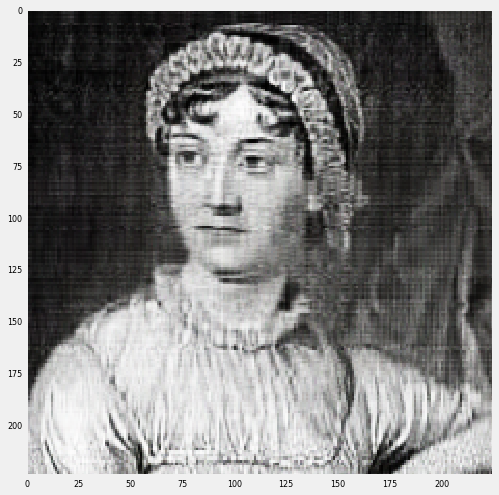

In [39]:
imshow(dec_image2, cmap='gray');

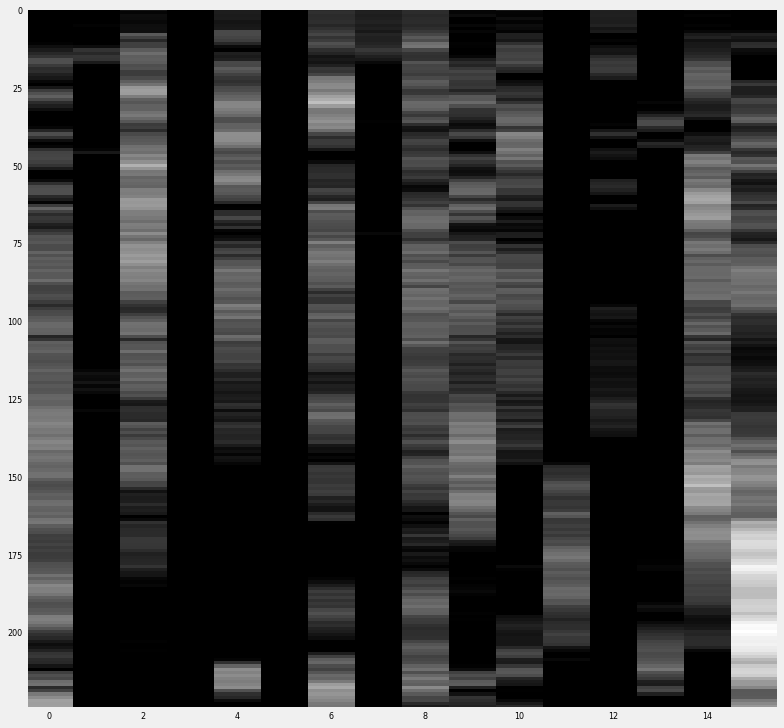

In [40]:
plt.figure(figsize=(12,12))
imshow(encoded_rows2, cmap='gray', aspect='auto');